In [1]:
import requests
# import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from pytrends.request import TrendReq
import demjson

# import matplotlib.animation as animation
from time import sleep
import numpy as np

bearer_token = "AAAAAAAAAAAAAAAAAAAAAAleWgEAAAAAjpme0V97Njl5DhfP1O6lJOqOzCA%3Dej1sPMnVUPoD1anGL1XHNGtMJqXFmIaHfSrZk9b987CVhyAY8L"
search_url = "https://api.twitter.com/2/tweets/counts/recent"

# Optional params: start_time,end_time,since_id,until_id,next_token,granularity
query_params = {'query': 'CHZ -is:retweet','granularity': 'hour'}

def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentTweetCountsPython"
    return r

def my_normalize(df):
    result = df.copy()
    max_value = df.max()
    min_value = df.min()
    result = (df - min_value) / (max_value - min_value)
    return result

def connect_to_endpoint(url, params):
    response = requests.request("GET", search_url, auth=bearer_oauth, params=params)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

200
                        start  tweet_count
0   2021-12-14 22:32:18+00:00           47
1   2021-12-14 23:00:00+00:00          102
2   2021-12-15 00:00:00+00:00          127
3   2021-12-15 01:00:00+00:00          173
4   2021-12-15 02:00:00+00:00          193
..                        ...          ...
164 2021-12-21 18:00:00+00:00          213
165 2021-12-21 19:00:00+00:00          162
166 2021-12-21 20:00:00+00:00          103
167 2021-12-21 21:00:00+00:00          120
168 2021-12-21 22:00:00+00:00           78

[169 rows x 2 columns]
[*********************100%***********************]  1 of 1 completed


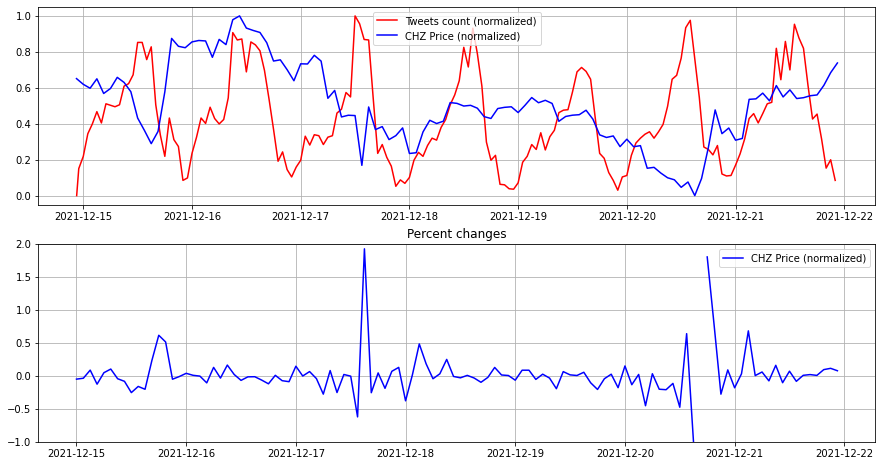

In [2]:
def main():
    fig1, [ax1, ax2] = plt.subplots(2, figsize=(15, 8))
    final = None
    
    #%% get twitter info
    json_response = connect_to_endpoint(search_url, query_params)
    df = pd.DataFrame(json_response['data'])
    df['start'] = pd.to_datetime(df['start'])
    final = df[['start', 'tweet_count']]
    print(final)
    final_norm = my_normalize(final["tweet_count"])
    
    # plot
    lineVal1, = ax1.plot(final["start"], final_norm, 
              c='r', label='Tweets count (normalized)')
    
    #%%
    if final is not None:
        start_time, end_time = final['start'].min(), final['start'].max()
    else:
        start_time, end_time = pd.to_datetime('2021-11-01'), pd.to_datetime('2021-12-01')
        
    #%% get CHZ info from the same time window
    stock_data = yf.download('CHZ-USD', start=start_time, end=end_time, interval='90m')
    stock_data.head()
    stock_data_norm = my_normalize(stock_data['Close'])
    lineVal1, = ax1.plot(stock_data_norm, c='b', label='CHZ Price (normalized)')
    # plt.xlabel('Date')
    # ax2.set_ylabel('Prices (normalized)')
    stock_data_changes = stock_data_norm.pct_change()
    lineVal2, = ax2.plot(stock_data_changes, c='b', label='CHZ Price (normalized)')
    
    #%% get BTC info from the same time window
    # stock_data = yf.download('BTC-USD', start=start_time, end=end_time, interval='30m')
    # stock_data.head()
    # stock_data_norm = my_normalize(stock_data['Close'])
    # lineVal1, = ax1.plot(stock_data_norm, c='k', label='BTC Price (normalized)')
    # # plt.xlabel('Date')
    # # ax2.set_ylabel('Prices (normalized)')
    # stock_data_changes = stock_data_norm.pct_change()
    # lineVal2, = ax2.plot(stock_data_changes, c='k', label='BTC Price (normalized)')
    
    #%% Getting data from Google Trends using Pytrends API
    # # Login to Google
    # pytrend = TrendReq()
    # # print(start_time.year)
    # # pytrend.build_payload(kw_list=['CHZ'], cat=0, timeframe=str(start_time.date())+' '+str(end_time.date())) # Build payload
    # # ggtrends_1 = pytrend.interest_over_time()
    # # ggtrends_1 = ggtrends_1.resample('1h').pad().drop(['isPartial'], axis='columns') # Upsample daily to hourly
    # ggtrends_1 = pytrend.get_historical_interest(['CHZ'], year_start=start_time.year, 
    #                       month_start=start_time.month, day_start=start_time.day, 
    #                       hour_start=start_time.hour, year_end=end_time.year, 
    #                       month_end=end_time.month, day_end=end_time.day, hour_end=end_time.hour, 
    #                       cat=0, sleep=0)
    # ggtrends_1 = ggtrends_1.drop(labels=['isPartial'],axis='columns')
    # print(ggtrends_1.head())
    # # ggtrends_1.columns = ['gg_crypto']
    # ggtrends_1_norm = my_normalize(ggtrends_1['CHZ'])
    # lineVal1, = ax1.plot(ggtrends_1_norm, c='g', label='Google trends CHZ (normalized)')
    # ggtrends_1_changes = ggtrends_1_norm.pct_change()
    # lineVal2, = ax2.plot(ggtrends_1_changes, c='g', label='Google trends Price (normalized) changes')
    
    #%% Getting BTC data from Google Trends using Pytrends API 
    # # Login to Google
    # pytrend = TrendReq()
    # ggtrends_2 = pytrend.get_historical_interest(['BTC'], year_start=start_time.year, 
    #                       month_start=start_time.month, day_start=start_time.day, 
    #                       hour_start=start_time.hour, year_end=end_time.year, 
    #                       month_end=end_time.month, day_end=end_time.day, hour_end=end_time.hour, 
    #                       cat=0, sleep=0)
    # ggtrends_2 = ggtrends_2.drop(labels=['isPartial'],axis='columns')
    # print(ggtrends_2.head())
    # # ggtrends_1.columns = ['gg_crypto']
    # ggtrends_2_norm = my_normalize(ggtrends_2['BTC'])
    # lineVal1, = ax1.plot(ggtrends_2_norm, c='orange', label='Google trends BTC (normalized)')
    # ggtrends_2_changes = ggtrends_1_norm.pct_change()
    # lineVal2, = ax2.plot(ggtrends_2_changes, c='orange', label='Google trends Price (normalized) changes')
    
    #%% Scraping "chiliZ" subreddit subscription growth data from redditmetrics.com

    #%%
    ax1.legend()
    ax1.grid()
    ax2.legend()
    ax2.grid()
    ax2.set_title('Percent changes')
    ax2.set_ylim(-1, 2)
    
    #%% vertical line stuff
    # def onMouseMove(event):
    #     ax1.axvline(x=event.xdata, color="k")
    #     ax2.axvline(x=event.xdata, color="k")
    
    # def updateData():
    #       global level1, val1
    #       global level2, val2
        
    #       clamp = lambda n, minn, maxn: max(min(maxn, n), minn)
        
    #       level1 = clamp(level1 + (np.random.random()-.5)/20.0, 0.0, 1.0)
    #       level2 = clamp(level2 + (np.random.random()-.5)/10.0, 0.0, 1.0)
        
    #       # values are appended to the respective arrays which keep the last 100 readings
    #       val1 = np.append(val1, level1)[-100:]
    #       val2 = np.append(val2, level2)[-100:]
        
    #       yield 1     # FuncAnimation expects an iterator
        
    # def visualize(i):
    
    #     lineVal1.set_ydata(val1)
    #     lineVal2.set_ydata(val2)
    
    #     return lineVal1,lineVal2
    
    # fig1.canvas.mpl_connect('motion_notify_event', onMouseMove)
    # ani = animation.FuncAnimation(fig1, visualize, updateData, interval=50)
    # plt.show()

if __name__ == "__main__":
    main()